In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [103]:
df = pd.read_csv('../data/accre-gpu-jobs-2022-v2.csv', error_bad_lines=False)

b'Skipping line 124084: expected 12 fields, saw 13\nSkipping line 124809: expected 12 fields, saw 13\n'


In [104]:
df.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED


In [105]:
df.shape

(336950, 12)

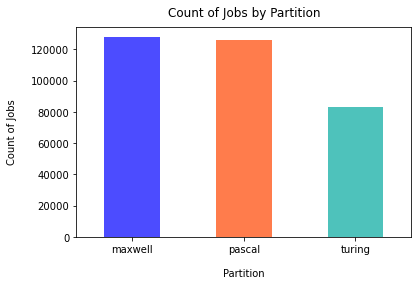

In [106]:

colors= [ '#0000FF', '#FF4500', '#03A89E']

ax = df.PARTITION.value_counts().plot(kind = 'bar' , color = colors, alpha = 0.7)

plt.xlabel("Partition", labelpad=14)
plt.xticks(rotation = 0)

plt.ylabel("Count of Jobs", labelpad=14)
plt.title("Count of Jobs by Partition", y=1.02)

plt.subplots_adjust(bottom=0.15)

plt.savefig('fig1.png', dpi = 250)



In [107]:
#List of all groups
print(df.ACCOUNT.unique())
print(' ')
print('Total number of accounts: '+str(df.ACCOUNT.nunique()))

['malanga' 'glasshouse' 'sunburst' 'virginia' 'harovin' 'antares' 'prince'
 'orange' 'grisette' 'horseradish' 'apple' 'pecans' 'pinole' 'clara'
 'pasilla' 'plumcot' 'kinnow' 'almonds' 'bunch' 'bertanne' 'cactus'
 'packham' 'summer' 'white' 'sugranineteen' 'gem' 'rosemarie']
 
Total number of accounts: 27


In [108]:
#How many unique ACCOUNTs use each PARTITION?
df.groupby('PARTITION')['ACCOUNT'].nunique()

PARTITION
maxwell     9
pascal     14
turing     14
Name: ACCOUNT, dtype: int64

Maxwell has the least number of groups using it. Pascal and Turing have equal number of groups using it. 

In [109]:
#How many unique USERs use each PARTITION?
df.groupby('PARTITION')['USER'].nunique()

PARTITION
maxwell     44
pascal     108
turing     111
Name: USER, dtype: int64

Maxwell has the least number of users. Pascal and Turing have rougly equal numbers of users.

In [150]:
df.STATE.unique()

array(['COMPLETED', 'CANCELLED by 9201', 'CANCELLED by 859023',
       'CANCELLED by 153500', 'CANCELLED by 168618',
       'CANCELLED by 888717', 'FAILED', 'CANCELLED by 859269',
       'CANCELLED by 756088', 'CANCELLED by 887337',
       'CANCELLED by 858683', 'CANCELLED', 'CANCELLED by 885613',
       'CANCELLED by 342288', 'CANCELLED by 855431',
       'CANCELLED by 491383', 'CANCELLED by 776393',
       'CANCELLED by 844796', 'CANCELLED by 780767',
       'CANCELLED by 505355', 'CANCELLED by 649321',
       'CANCELLED by 890189', 'CANCELLED by 59229', 'CANCELLED by 649319',
       'CANCELLED by 590520', 'CANCELLED by 478095',
       'CANCELLED by 196703', 'CANCELLED by 308082',
       'CANCELLED by 757496', 'CANCELLED by 454080',
       'CANCELLED by 512947', 'CANCELLED by 762866',
       'CANCELLED by 859465', 'CANCELLED by 161909',
       'CANCELLED by 785491', 'CANCELLED by 90423', 'CANCELLED by 159541',
       'CANCELLED by 859439', 'CANCELLED by 349259',
       'CANCELLED by 

In [ ]:
country_list = ['brazil','poland','russia','countrydummy','usa']

filtered_df = df[df['Country Name'].isin(country_list)]
print(filtered_df )


state_fil = ['COMPLETED', 'FAILED']

#Observation: Maxwell has the least number of users but the most number of jobs. This suggests there are only a few number of groups that use Maxwell, but use it frequently enough to make Maxwell the most used partition.

In [110]:
#What are the number of jobs by ACCOUNT?
ct_acc = df.ACCOUNT.value_counts()
pct_acc = df.ACCOUNT.value_counts(normalize=True)*100
pd.concat([ct_acc, pct_acc], axis = 1, keys=['Count', 'Percentage'] )

,Count,Percentage
glasshouse,247125,73.341742
malanga,51677,15.336697
virginia,10342,3.069298
prince,7499,2.225553
grisette,5828,1.729633
harovin,5046,1.497552
antares,3222,0.956225
sunburst,1522,0.451699
pasilla,1362,0.404214
plumcot,1080,0.320522


In [111]:
#Make a table contingency table columns maxwell, turing, pascal, rows each account

#make bar plot showing bars in each partition for each account
pa_ac_ct=df.groupby('PARTITION')['ACCOUNT'].value_counts()
pa_ac_pct=df.groupby('PARTITION')['ACCOUNT'].value_counts(normalize=True)
tab2 = pd.concat([pa_ac_ct, pa_ac_pct], axis=1, keys=['Count', 'Percentage'])
tab2


Count  Percentage
PARTITION ACCOUNT                          
maxwell   glasshouse     126458    0.986196
          plumcot          1080    0.008422
          pasilla           431    0.003361
          clara             100    0.000780
          orange             79    0.000616
          bertanne           42    0.000328
          white              36    0.000281
          apple               1    0.000008
          summer              1    0.000008
pascal    malanga         51677    0.410947
          glasshouse      44933    0.357317
          virginia         9590    0.076262
          prince           7448    0.059228
          grisette         5828    0.046346
          antares          3136    0.024938
          sunburst         1522    0.012103
          pecans            628    0.004994
          kinnow            436    0.003467
          pasilla           425    0.003380
          rosemarie          56    0.000445
          horseradish        52    0.000414
          bertanne           13    0.000103
          packham             7    0.000056
turing    glasshouse      75734    0.912777
          harovin          5046    0.060816
          virginia          752    0.009063
          pasilla           506    0.006099
          almonds           221    0.002664
          apple             209    0.002519
          bertanne          166    0.002001
          cactus            117    0.001410
          antares            86    0.001037
          prince             51    0.000615
          sugranineteen      43    0.000518
          pinole             20    0.000241
          gem                19    0.000229
          bunch               1    0.000012

In [122]:
tab2 = pd.DataFrame(tab2)
tab2

,PARTITION,ACCOUNT,Count,Percentage
0,maxwell,glasshouse,126458,0.986196
1,maxwell,plumcot,1080,0.008422
2,maxwell,pasilla,431,0.003361
3,maxwell,clara,100,0.000780
4,maxwell,orange,79,0.000616
5,maxwell,bertanne,42,0.000328
6,maxwell,white,36,0.000281
7,maxwell,apple,1,0.000008
8,maxwell,summer,1,0.000008
9,pascal,malanga,51677,0.410947


In [140]:
tabss = tab2.groupby('PARTITION')['Percentage'].max()
tabss = pd.DataFrame(tabss)
tabss


,Percentage
PARTITION,
maxwell,0.986196
pascal,0.410947
turing,0.912777


In [141]:
tabss.reset_index(inplace = True)

In [142]:
tabss

,PARTITION,Percentage
0,maxwell,0.986196
1,pascal,0.410947
2,turing,0.912777


In [143]:
maxper = tabss['Percentage']

In [148]:
maxtab = tab2[tab2['Percentage'].isin(maxper)]
maxtab

,PARTITION,ACCOUNT,Count,Percentage
0,maxwell,glasshouse,126458,0.986196
9,pascal,malanga,51677,0.410947
23,turing,glasshouse,75734,0.912777


In [149]:
maxtab.to_csv('maxtab.csv')  

In [138]:
#tab2.loc[tab2['Percentage'] == tabss['Percentage']]

In [11]:
pa_ac_ct_t = pd.DataFrame(pa_ac_ct)
pa_ac_ct_t = pa_ac_ct_t.rename(columns={'ACCOUNT': 'Count'})
pa_ac_ct_t.reset_index(inplace=True)
pa_ac_ct_t

,PARTITION,ACCOUNT,Count
0,maxwell,glasshouse,126458
1,maxwell,plumcot,1080
2,maxwell,pasilla,431
3,maxwell,clara,100
4,maxwell,orange,79
5,maxwell,bertanne,42
6,maxwell,white,36
7,maxwell,apple,1
8,maxwell,summer,1
9,pascal,malanga,51677


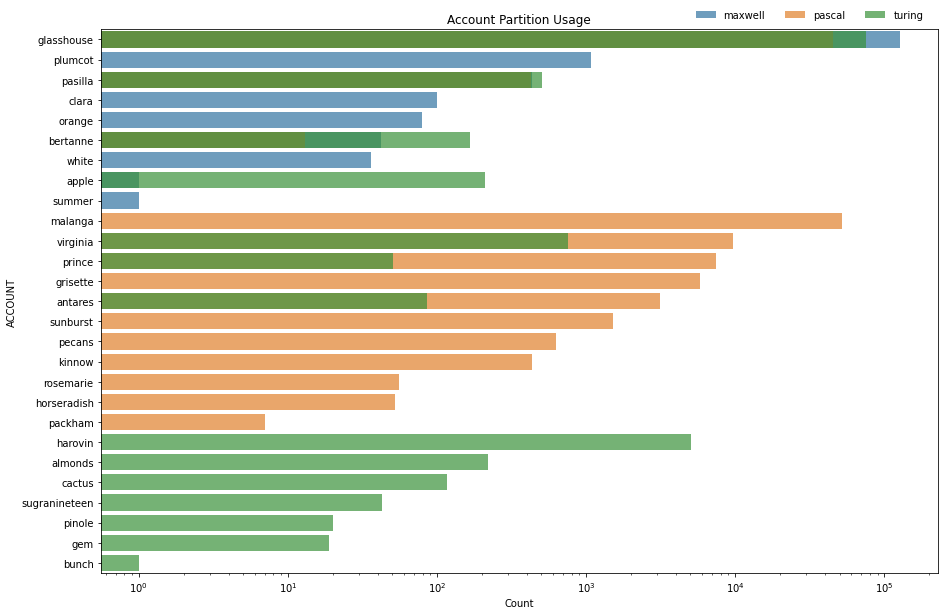

In [112]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=pa_ac_ct_t, x = 'Count', y = 'ACCOUNT', hue='PARTITION', log = True, ax = ax, dodge=False, alpha=0.7)

plt.legend(bbox_to_anchor=([0.7, 1, 0, 0]), ncol=4, frameon=False)
plt.title('Account Partition Usage')
plt.savefig('figure2.png', dpi = 150)
plt.show()



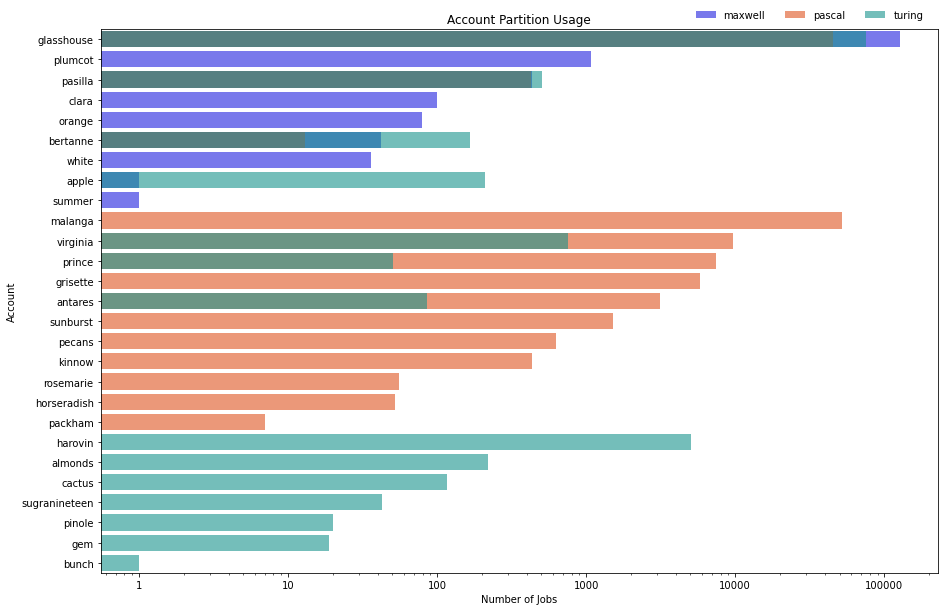

In [69]:
colors= [ '#0000FF', '#FF4500', '#03A89E']
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=pa_ac_ct_t, x = 'Count', y = 'ACCOUNT', 
                 hue='PARTITION', log = True, ax = ax, 
                 palette= colors, dodge=False, alpha=0.6)

import matplotlib.ticker as ticker

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x)))
plt.xlabel('Number of Jobs', fontsize=10)
plt.ylabel('Account', fontsize=10)
plt.legend(bbox_to_anchor=([0.7, 1, 0, 0]), ncol=4, frameon=False)
plt.title('Account Partition Usage')
plt.savefig('figure2.png', dpi = 150)
plt.show()



#Observation: Glasshouse has the most number of all jobs, and is the top user for maxwell (98% of all maxwell jobs) and turing (91% of all turing jobs). Glasswell is the second top user for the pascal partition(35% of all pascal jobs). Malanga is the second top user for all jobs, and top user for the pascal partition (41% of all pascal jobs). Malanga only uses the pascal partition.

In [13]:
tab3 = (df.groupby(['ACCOUNT'])['PARTITION'].value_counts() / df.groupby('ACCOUNT')['PARTITION'].count())
tab3 = tab3.unstack(level=1)

In [151]:
tab3

PARTITION,maxwell,pascal,turing
ACCOUNT,,,
almonds,NaN,NaN,1.000000
antares,NaN,0.973309,0.026691
apple,0.004762,NaN,0.995238
bertanne,0.190045,0.058824,0.751131
bunch,NaN,NaN,1.000000
cactus,NaN,NaN,1.000000
clara,1.000000,NaN,NaN
gem,NaN,NaN,1.000000
glasshouse,0.511717,0.181823,0.306460


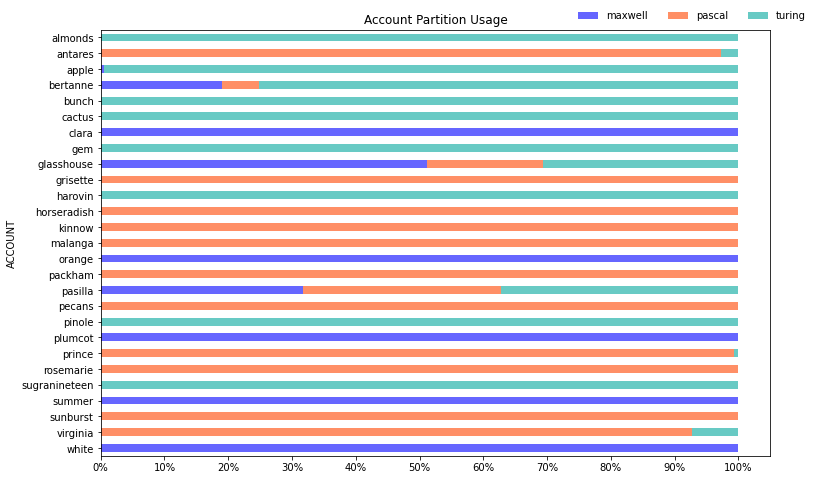

In [160]:
colors= [ '#0000FF', '#FF4500', '#03A89E']
ax = tab3.plot(kind = 'barh', stacked = True, ylabel = 'Percent', alpha = 0.6, rot=0, color=colors, figsize=(12,8))
xticks = np.arange(0,1.1,0.1)
xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels)
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=([0.7, 1, 0, 0]), ncol=4, frameon=False)
plt.title('Account Partition Usage')
plt.subplots_adjust(bottom=0.14)
plt.savefig('fig3.png', dpi = 250)
plt.show();

#Observation: Most groups use primarily one partition , there is little variablitiy within each group for partition used. The groups that show variability in partition use are Pasilla, Glasshouse and Bertanne. Other groups primarily stick to one partition. The plot shows Maxwell is the least used partition across different groups, only showing up in 9 groups.

In [205]:
tab3_fil = tab3.loc[['bertanne', 'glasshouse','pasilla']]

In [206]:
tab3_fil

PARTITION,maxwell,pascal,turing
ACCOUNT,,,
bertanne,0.190045,0.058824,0.751131
glasshouse,0.511717,0.181823,0.306460
pasilla,0.316446,0.312041,0.371512


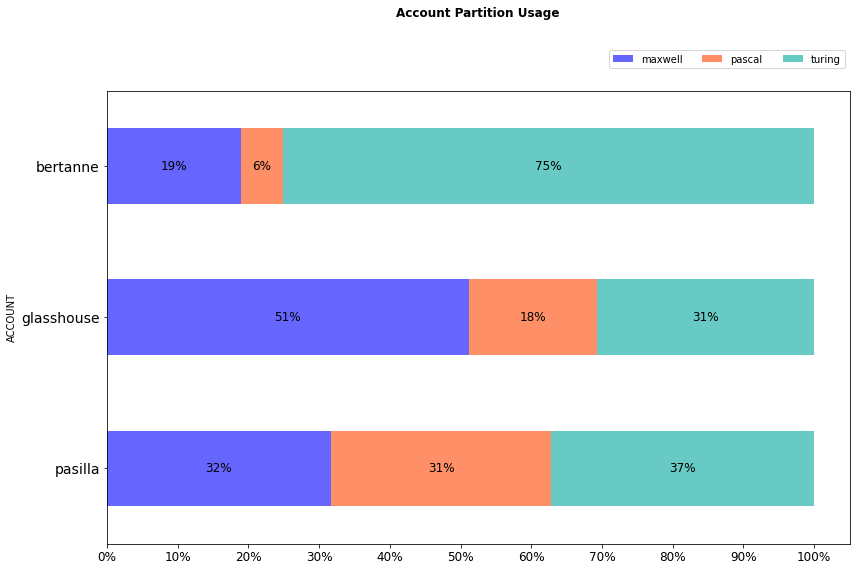

In [207]:
colors= [ '#0000FF', '#FF4500', '#03A89E']
ax = tab3_fil.plot(kind = 'barh', stacked = True, ylabel = 'Percent', alpha = 0.6, rot=0, color=colors, figsize=(12,8))
xticks = np.arange(0,1.1,0.1)
xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels, fontsize=12)
plt.yticks(fontsize = 14)
plt.gca().invert_yaxis()


for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and can be used as the label
    label_text = f'{width:.0%}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    


plt.legend(bbox_to_anchor=([1, 1.1, 0, 0]), ncol=4)
plt.title('Account Partition Usage', y = 1.15, fontweight = 'bold' )
#plt.subplots_adjust(bottom=0.14)
plt.tight_layout()


plt.savefig('fig4.png', dpi = 250)
plt.show();

In [208]:
tab4_fil = tab3.loc[['antares','apple', 'prince', 'virginia' ]]

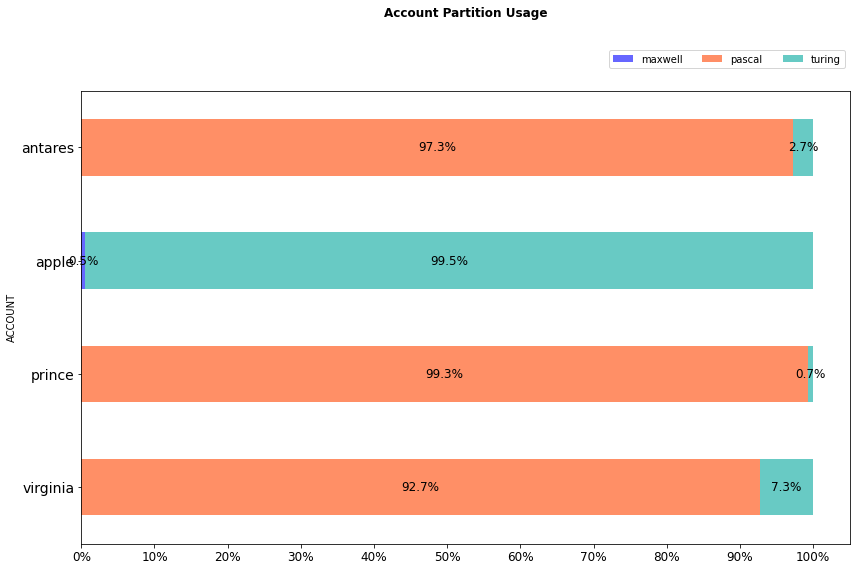

In [210]:
colors= [ '#0000FF', '#FF4500', '#03A89E']
ax = tab4_fil.plot(kind = 'barh', stacked = True, ylabel = 'Percent', alpha = 0.6, rot=0, color=colors, figsize=(12,8))
xticks = np.arange(0,1.1,0.1)
xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels, fontsize=12)
plt.yticks(fontsize = 14)
plt.gca().invert_yaxis()


for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and can be used as the label
    label_text = f'{width:.1%}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    


plt.legend(bbox_to_anchor=([1, 1.1, 0, 0]), ncol=4)
plt.title('Account Partition Usage', y = 1.15, fontweight = 'bold' )
#plt.subplots_adjust(bottom=0.14)
plt.tight_layout()


plt.savefig('tab4_fil.png', dpi = 250)
plt.show();

In [211]:
tab5_turing = tab3.loc[['almonds', 'bunch' , 'cactus', 'gem', 'harovin', 'pinole', 'sugranineteen']]

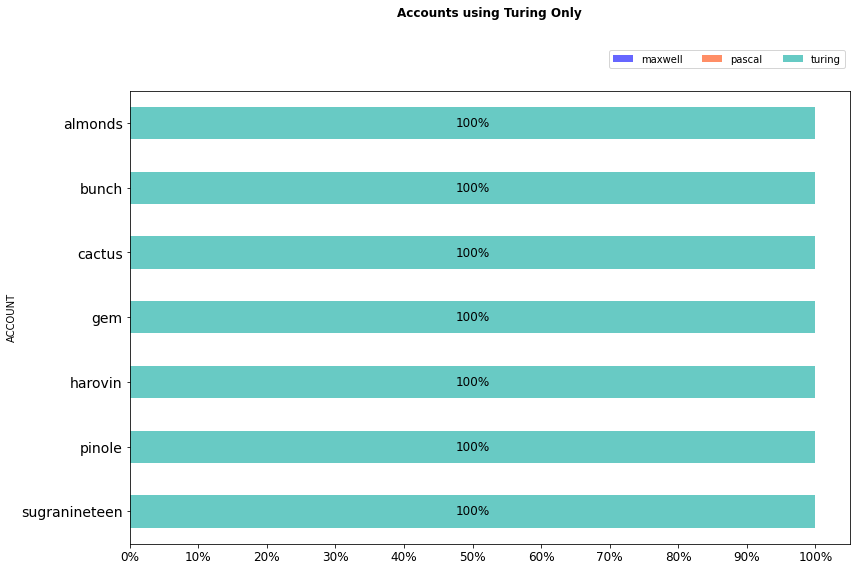

In [215]:
colors= [ '#0000FF', '#FF4500', '#03A89E']
ax = tab5_turing.plot(kind = 'barh', stacked = True, ylabel = 'Percent', alpha = 0.6, rot=0, color=colors, figsize=(12,8))
xticks = np.arange(0,1.1,0.1)
xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels, fontsize=12)
plt.yticks(fontsize = 14)
plt.gca().invert_yaxis()


for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and can be used as the label
    label_text = f'{width:.0%}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    


plt.legend(bbox_to_anchor=([1, 1.1, 0, 0]), ncol=4)
plt.title('Accounts using Turing Only', y = 1.15, fontweight = 'bold' )
#plt.subplots_adjust(bottom=0.14)
plt.tight_layout()


plt.savefig('tab5_tur.png', dpi = 250)
plt.show();

In [216]:
tab5_max = tab3.loc[['clara', 'orange', 'plumcot', 'summer', 'white' ]]

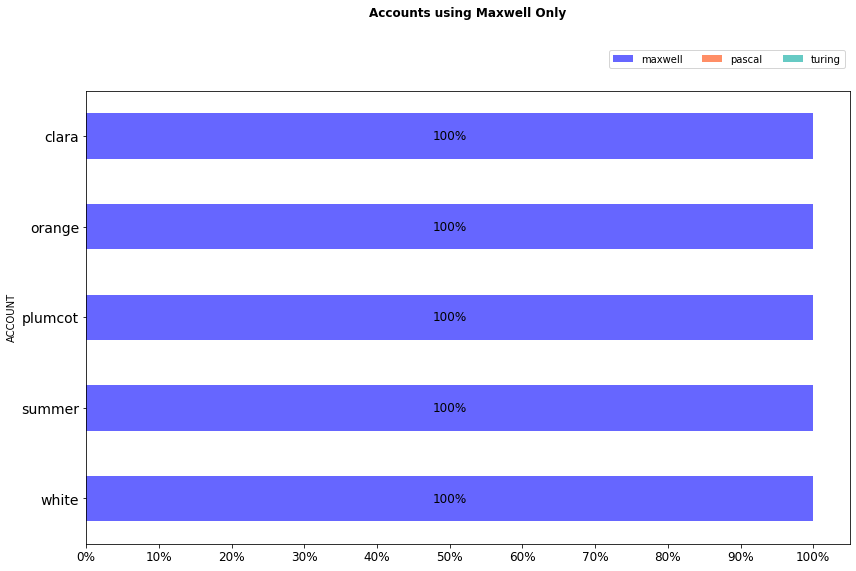

In [218]:
colors= [ '#0000FF', '#FF4500', '#03A89E']
ax = tab5_max.plot(kind = 'barh', stacked = True, ylabel = 'Percent', alpha = 0.6, rot=0, color=colors, figsize=(12,8))
xticks = np.arange(0,1.1,0.1)
xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels, fontsize=12)
plt.yticks(fontsize = 14)
plt.gca().invert_yaxis()


for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and can be used as the label
    label_text = f'{width:.0%}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    


plt.legend(bbox_to_anchor=([1, 1.1, 0, 0]), ncol=4)
plt.title('Accounts using Maxwell Only', y = 1.15, fontweight = 'bold' )
#plt.subplots_adjust(bottom=0.14)
plt.tight_layout()


plt.savefig('tab5_max.png', dpi = 250)
plt.show();

In [219]:
tab5_pasc = tab3.loc[['grisette', 'horseradish', 'kinnow', 
                      'malanga', 'packham', 'pecans',
                       'rosemarie', 'sunburst']]

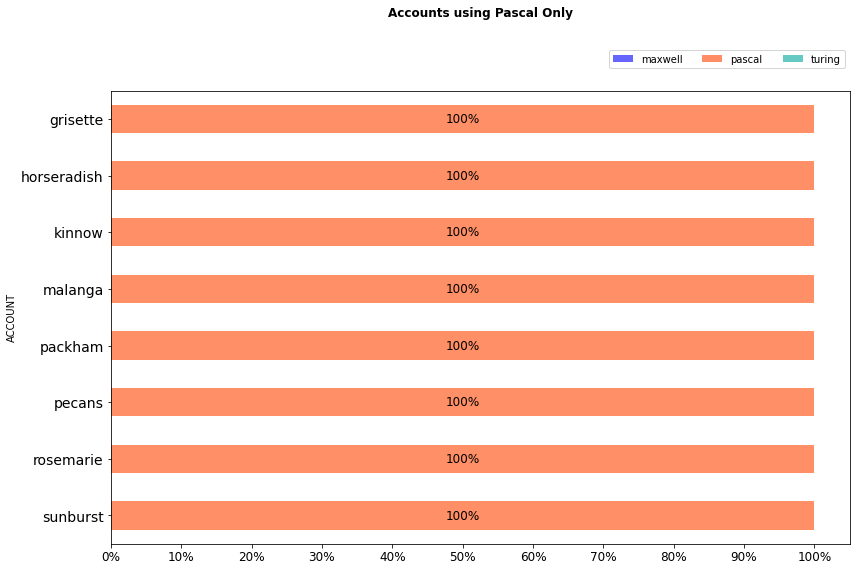

In [220]:
colors= [ '#0000FF', '#FF4500', '#03A89E']
ax = tab5_pasc.plot(kind = 'barh', stacked = True, ylabel = 'Percent', alpha = 0.6, rot=0, color=colors, figsize=(12,8))
xticks = np.arange(0,1.1,0.1)
xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels, fontsize=12)
plt.yticks(fontsize = 14)
plt.gca().invert_yaxis()


for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and can be used as the label
    label_text = f'{width:.0%}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    


plt.legend(bbox_to_anchor=([1, 1.1, 0, 0]), ncol=4)
plt.title('Accounts using Pascal Only', y = 1.15, fontweight = 'bold' )
#plt.subplots_adjust(bottom=0.14)
plt.tight_layout()


plt.savefig('tab5_pasc.png', dpi = 250)
plt.show();

In [15]:
#area plot, don't know if it is useful/meaningful
#ax = tab3.plot(kind='area', ylabel='Percent', rot=0, figsize=(10,10))

#### More Data Exploration

In [16]:
#Unique values for Completion State: Uncomment to check
#df.STATE.unique()

In [17]:
df.dtypes

JOBID        object
ACCOUNT      object
USER         object
USEDMEM      object
REQTIME      object
USEDTIME     object
NODES         int64
CPUS          int64
GPUS          int64
PARTITION    object
EXITCODE     object
STATE        object
dtype: object

In [18]:
#GPU values
df.GPUS.unique()

array([ 1,  2,  4,  3,  8, 32, 24, 16, 18, 12,  6, 40, 60, 30, 20],
      dtype=int64)

In [19]:
#USEDMEM column
df.USEDMEM.head(3)

0     18.66M
1          0
2    402.32M
Name: USEDMEM, dtype: object

In [20]:
#Clean USEDMEM column
df['USEDMEM']= df["USEDMEM"].str.replace("M","")

#strip away trailing space
df.USEDMEM = df['USEDMEM'].str.strip()

#convert USEDMEM to float
df = df.astype({"USEDMEM":'float'})

#check USEDMEM data type, make sure its float
df.USEDMEM.dtypes

dtype('float64')

In [21]:
#USEDTIME column
df.USEDTIME.head(3)

0    00:13:13
1    00:00:22
2    00:08:57
Name: USEDTIME, dtype: object

In [22]:
#replace '-' in usedtime with days
df.USEDTIME= df.USEDTIME.str.replace('-','days ',regex=True)

#create new column USEDTIMEtd, convert USEDTIME to time
df['USEDTIMEtd'] = pd.to_timedelta(df['USEDTIME'])

#create new column USEDTIME_SEC, convert 

In [23]:
df['USEDTIMEtd'] = pd.to_timedelta(df['USEDTIME'])

In [24]:
df.head(5)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10


In [25]:
df['USEDTIME_SEC'] = df['USEDTIMEtd'].dt.total_seconds()

In [26]:
df.head(3)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0


1. What is the distribution of per-GPU main memory usage over all runtime-weighed jobs in each partition? Knowing this will help ACCRE to understand our users memory needs for future hardware purchases.

In [27]:
#Filter for completed states and usedtime > 0
df_filtered = df[(df['STATE'] == 'COMPLETED') & (df['USEDTIME_SEC'] != 0)]

In [28]:
df_filtered.shape

(283288, 14)

In [29]:
#weigh jobs by runtime(usedtime), and show distribution of memory usage per GPU

In [30]:
#Make a weight column - weight = gpu * runtime in seconds
df_filtered['gputime_weight'] = df_filtered['GPUS']*df_filtered['USEDTIME_SEC']

<ipython-input-30-1ce012a56263>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gputime_weight'] = df_filtered['GPUS']*df_filtered['USEDTIME_SEC']


In [31]:
df_filtered['memory_per_gpu'] = df_filtered['USEDMEM']/df_filtered['GPUS']

<ipython-input-31-e195283adf2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['memory_per_gpu'] = df_filtered['USEDMEM']/df_filtered['GPUS']


In [32]:
df_filtered['weighted_mem_per_gpu'] = df_filtered['gputime_weight']*df_filtered['memory_per_gpu']

<ipython-input-32-1f0a942878f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['weighted_mem_per_gpu'] = df_filtered['gputime_weight']*df_filtered['memory_per_gpu']


In [33]:
df_filtered.head(3)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC,gputime_weight,memory_per_gpu,weighted_mem_per_gpu
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0,793.0,18.66,14797.38
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0,22.0,0.00,0.00
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0,537.0,402.32,216045.84


In [34]:
#Filter out 0 mem per gpu
df_filtered = df_filtered[df_filtered['memory_per_gpu'] != 0]

In [35]:
#Sort dataframe by partition and memory per gpu
df_filtered = df_filtered.sort_values(['PARTITION' , 'memory_per_gpu'])

In [36]:
df_filtered.head(2)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC,gputime_weight,memory_per_gpu,weighted_mem_per_gpu
57704,35317072,clara,suzanna,0.01,4-23:59:00,5days 00:00:04,1,3,1,maxwell,0:0,COMPLETED,5 days 00:00:04,432004.0,432004.0,0.0100,4320.04
81792,40850031,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,320.0,0.0525,16.80


In [37]:
#Make Cumulative Weight column, the cumulative weight for each memory_per_gpu within each partition
df_filtered['cum_wt'] = df_filtered.groupby('PARTITION')['gputime_weight'].cumsum()

In [38]:
#Make cumulative percentage for weights column--the cumulative weight / sum of all weights in each partition
#this is the cumulative percentage of the weight. Weight is usedtime*gpu
df_filtered['cum_percentage'] = df_filtered['cum_wt']/df_filtered.groupby('PARTITION')['gputime_weight'].transform('sum')

In [39]:
percentile = 0.5

df_filtered.loc[df_filtered['cum_percentage'] >= percentile].groupby('PARTITION').head(1)
#this would give you within each partition, where the cumulative percentage > 50,
#so it filters for the 50th percentile value of memory per gpu
#Ex: for maxwell, the 5oth percentile memory per gpu is 356.5, so 50 percent of the memory pergpus are below 356.5
#50% of the runtimes are using 356.5 mem per gpu in maxwell
#50% of the runtimes are using 

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC,gputime_weight,memory_per_gpu,weighted_mem_per_gpu,cum_wt,cum_percentage
57748,35360906,glasshouse,collier,4277.56,3-08:00:00,1days 17:21:58,2,2,12,maxwell,0:0,COMPLETED,1 days 17:21:58,148918.0,1787016.0,356.463333,6.370057e+08,166509465.0,0.502649
59458,35874261,glasshouse,birdella,427.05,5-00:00:00,2days 12:25:00,1,1,1,pascal,0:0,COMPLETED,2 days 12:25:00,217500.0,217500.0,427.050000,9.288338e+07,600884119.0,0.500142
134561,43955704_9,harovin,porsha,3915.08,5-00:00:00,10:01:59,1,6,1,turing,0:0,COMPLETED,0 days 10:01:59,36119.0,36119.0,3915.080000,1.414088e+08,366975218.0,0.500028


In [40]:
df_filtered.head(2)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC,gputime_weight,memory_per_gpu,weighted_mem_per_gpu,cum_wt,cum_percentage
57704,35317072,clara,suzanna,0.01,4-23:59:00,5days 00:00:04,1,3,1,maxwell,0:0,COMPLETED,5 days 00:00:04,432004.0,432004.0,0.0100,4320.04,432004.0,0.001304
81792,40850031,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,320.0,0.0525,16.80,432324.0,0.001305


In [41]:
#cumulative percentage of runtime pe
#how much memory was used on that second. 

In [42]:
#multiply the cumulative percentage of the weight by memory per gpu
#this should be the weighted cumulative memory per gpu
df_filtered['cum_wt_pctg_mem_per_gpu'] = df_filtered['cum_percentage']*df_filtered['memory_per_gpu']
#maybe calculate this without the cumulative, and plot the cumulative on the graph, so you don't calculate cumulative twice 
#so instead of calculating cumulative percentage, sort memories in ascending order, 


In [43]:
#overall summaries
#- shape of data, partitions, percent in each partition, what is everyone doing, 

In [ ]:
#Try new column without dividing out by time--multiply usedmem * usedtime_sec
df_test['RT_USEDMEM'] = df_test['USEDMEM']*df_test['USEDTIME_SEC']

In [ ]:
df_test.RT_USEDMEM.describe()

In [ ]:
df_test.RT_USEDMEM.describe()
df_test.boxplot(column=['RT_USEDMEM'], by='PARTITION', figsize=(5,5));

In [ ]:
#histogram for runtime*usedmemory
df_test.hist(by = 'PARTITION', column = 'RT_USEDMEM', layout=(1, 3), figsize= (5,5))
plt.show()

#histogram for runtime weighted memory
df_test.hist(by = 'PARTITION', column = 'RT_WEIGHTED_MEM', layout=(1, 3), figsize= (5,5))
plt.show()

In [ ]:
df_test.groupby(['PARTITION'])['RT_WEIGHTED_MEM'].agg(['sum'])
#sum of rt_used mem, then divide that by the sum of usedtime

In [ ]:
#df_test.groupby(['PARTITION'])['USEDMEM']*(['USEDTIME_SEC']/(['USEDTIME_SEC'].agg('sum'))
##? Trying to calculate the runtime weighted memory usage after grouping by partition

In [ ]:
df_test['Percent_of_Partition_RT'] = df_test['USEDTIME_SEC'] / df_test.groupby('PARTITION')['USEDTIME_SEC'].transform('sum')
#see how much each runtime contributed to the total runtime in the partition's total runtime

In [ ]:
df_test.head()

In [ ]:
df_test['Percent_of_Partition_RT_USEDMEM'] = df_test['Percent_of_Partition_RT']*df_test['USEDMEM']

In [ ]:
df_test.groupby(['PARTITION']).apply(lambda x: x['Percent_of_Partition_RT_USEDMEM']/x['GPUS'])

In [ ]:
df['MEM_PER_GPU'] = df['RT_USEDMEM']/df['GPUS']


In [ ]:
df.head()

In [ ]:
#make new column 'weighted_memory'
#df['WEIGHTED_MEMORY'] = df['USEDMEM']/df['GPUS']

In [ ]:
#DF['WEIGHTED_MEMORY'] = d['MEM']/df['GPUS']*df['USEDTIME']

In [ ]:
#w = df.groupby('PARTITION')['weighted_memory'].agg('sum')
#turing uses more memory and for longer--the average went up when accounting for how long-the memory usage is much higher
#job using more memory and time is more influential, 
#weighted and unweighted - when not accounting for length, pascal and maxwell much shorter times
##calculate duration/job
#maxwell more popular but jobs run much shorter
#distribution of different states




In [ ]:
#df_[df['GPUS'] > 4].groupby(['PARTITION']).count()/df1[df1['GPUS'] > 4]

2. What is the distribution of the number of GPUs in each job (runtime-weighted) for each partition? What fraction of runtime-weighted and GPU-weighted jobs are using more than 4 GPUs and thus probably using the RoCE networking? Is this fraction different for each partition?

What is the distribution of the number of GPUs in each job (runtime-weighted) for each partition? What fraction of runtime-weighted and GPU-weighted jobs are using more than 4 GPUs and thus probably using the RoCE networking? Is this fraction different for each partition?


1)runtime alone weighted:     runtime of all jobs in the partition, out of that what is the fraction that uses 1 GPU, 2GPUS 3GPUS, 
Ex: 1 GPU was run on 3 hours, or 2GPUs on 60 hrs etc, 10 GPUs take this much time, etc, 
-group by GPU



or runtime and GPU weighted:        

2)  fraction:  usedtime * GPU > 4441058

# Q3. What is the total runtime usage per-gpu (i.e. multiply runtime by the number of gpus) in each of the 3 partitions over the last year?

In [221]:
df_filtered.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC,gputime_weight,memory_per_gpu,weighted_mem_per_gpu,cum_wt,cum_percentage,cum_wt_pctg_mem_per_gpu
57704,35317072,clara,suzanna,0.01,4-23:59:00,5days 00:00:04,1,3,1,maxwell,0:0,COMPLETED,5 days 00:00:04,432004.0,432004.0,0.0100,4320.04,432004.0,0.001304,0.000013
81792,40850031,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,320.0,0.0525,16.80,432324.0,0.001305,0.000069
81793,40850186,glasshouse,mel,0.84,5-00:00:00,00:00:21,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:21,21.0,336.0,0.0525,17.64,432660.0,0.001306,0.000069
81794,40850269,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,320.0,0.0525,16.80,432980.0,0.001307,0.000069
81795,40850643,glasshouse,mel,0.84,5-00:00:00,00:00:21,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:21,21.0,336.0,0.0525,17.64,433316.0,0.001308,0.000069


In [222]:
df_filtered['usedtime_x_gpu'] = df_filtered['GPUS']*df_filtered['USEDTIME_SEC']

In [223]:
df_filtered.usedtime_x_gpu.describe()

count    2.774630e+05
mean     8.169023e+03
std      6.927550e+04
min      1.000000e+00
25%      3.700000e+01
50%      2.020000e+02
75%      5.720000e+02
max      1.124694e+07
Name: usedtime_x_gpu, dtype: float64

In [224]:
df_filtered.groupby('PARTITION')['usedtime_x_gpu'].sum()

PARTITION
maxwell    3.312641e+08
pascal     1.201428e+09
turing     7.339095e+08
Name: usedtime_x_gpu, dtype: float64

In [225]:
df_filtered['usedtime_x_gpu_hrs'] = df_filtered['usedtime_x_gpu']/ 36000

In [226]:
df_filtered.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,...,USEDTIMEtd,USEDTIME_SEC,gputime_weight,memory_per_gpu,weighted_mem_per_gpu,cum_wt,cum_percentage,cum_wt_pctg_mem_per_gpu,usedtime_x_gpu,usedtime_x_gpu_hrs
57704,35317072,clara,suzanna,0.01,4-23:59:00,5days 00:00:04,1,3,1,maxwell,...,5 days 00:00:04,432004.0,432004.0,0.0100,4320.04,432004.0,0.001304,0.000013,432004.0,12.000111
81792,40850031,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,...,0 days 00:00:20,20.0,320.0,0.0525,16.80,432324.0,0.001305,0.000069,320.0,0.008889
81793,40850186,glasshouse,mel,0.84,5-00:00:00,00:00:21,3,33,16,maxwell,...,0 days 00:00:21,21.0,336.0,0.0525,17.64,432660.0,0.001306,0.000069,336.0,0.009333
81794,40850269,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,...,0 days 00:00:20,20.0,320.0,0.0525,16.80,432980.0,0.001307,0.000069,320.0,0.008889
81795,40850643,glasshouse,mel,0.84,5-00:00:00,00:00:21,3,33,16,maxwell,...,0 days 00:00:21,21.0,336.0,0.0525,17.64,433316.0,0.001308,0.000069,336.0,0.009333


In [230]:
part_gpu_hrs = df_filtered.groupby(['PARTITION', 'GPUS'])['usedtime_x_gpu_hrs'].sum()

In [231]:
part_gpu_hrs

PARTITION  GPUS
maxwell    1        5364.248833
           2          65.214667
           3          13.560833
           4        2406.485556
           6         127.454500
           8         181.863111
           12        856.915000
           16        155.413333
           18          9.218000
           24         21.402667
           40          0.003333
pascal     1       19880.681889
           2        1862.433444
           3          68.400250
           4        7325.170889
           8        1048.445778
           12          5.438333
           16       2520.541778
           24        590.751333
           32         71.127111
           60          0.008333
turing     1       13274.592111
           2         960.378111
           3         281.209917
           4        4924.419111
           8         834.966000
           12          0.022000
           16        110.553333
           40          0.234444
Name: usedtime_x_gpu_hrs, dtype: float64

In [233]:
part_gpu_hrs = pd.DataFrame(part_gpu_hrs)
part_gpu_hrs

usedtime_x_gpu_hrs
PARTITION GPUS                    
maxwell   1            5364.248833
          2              65.214667
          3              13.560833
          4            2406.485556
          6             127.454500
          8             181.863111
          12            856.915000
          16            155.413333
          18              9.218000
          24             21.402667
          40              0.003333
pascal    1           19880.681889
          2            1862.433444
          3              68.400250
          4            7325.170889
          8            1048.445778
          12              5.438333
          16           2520.541778
          24            590.751333
          32             71.127111
          60              0.008333
turing    1           13274.592111
          2             960.378111
          3             281.209917
          4            4924.419111
          8             834.966000
          12              0.022000
          16            110.553333
          40              0.234444

In [235]:
part_gpu_hrs.reset_index(inplace=True)

In [236]:
part_gpu_hrs.columns

Index(['PARTITION', 'GPUS', 'usedtime_x_gpu_hrs'], dtype='object')

In [237]:
part_gpu_hrs

,PARTITION,GPUS,usedtime_x_gpu_hrs
0,maxwell,1,5364.248833
1,maxwell,2,65.214667
2,maxwell,3,13.560833
3,maxwell,4,2406.485556
4,maxwell,6,127.454500
5,maxwell,8,181.863111
6,maxwell,12,856.915000
7,maxwell,16,155.413333
8,maxwell,18,9.218000
9,maxwell,24,21.402667


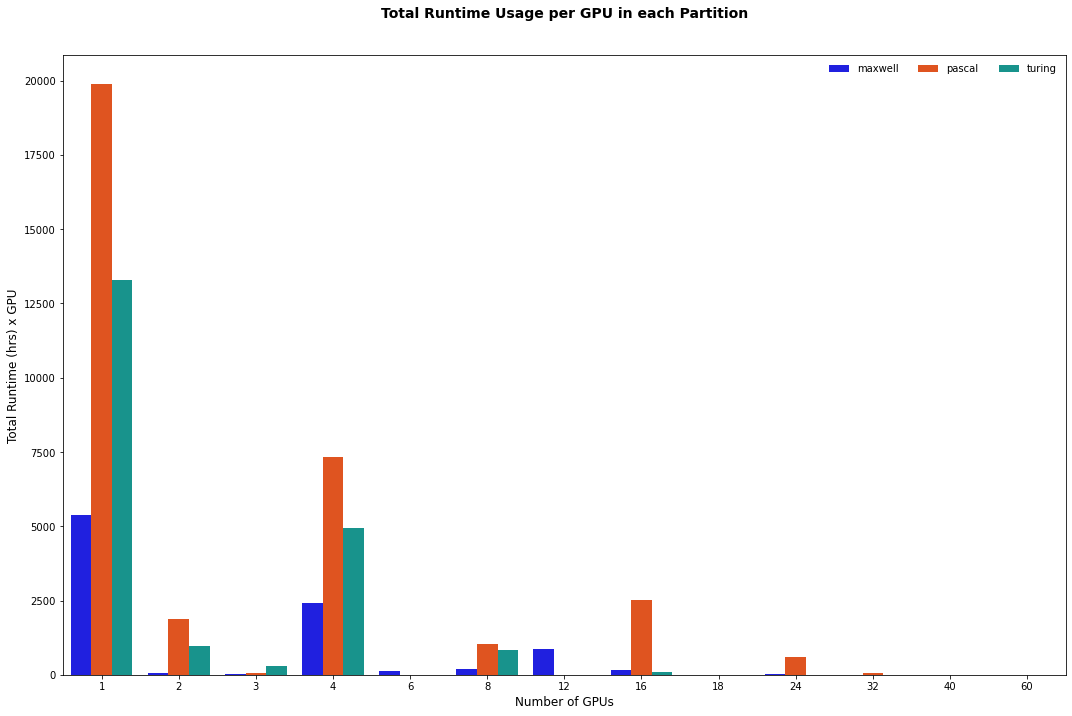

In [259]:
colors= [ '#0000FF', '#FF4500', '#03A89E']
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=part_gpu_hrs, x= 'GPUS', y='usedtime_x_gpu_hrs',  
                 hue='PARTITION', ax = ax, 
                 palette= colors)

import matplotlib.ticker as ticker


plt.xlabel('Number of GPUs', fontsize=12)
plt.ylabel('Total Runtime (hrs) x GPU', fontsize=12)
plt.legend(loc='upper right', ncol=4, frameon=False)
plt.title('Total Runtime Usage per GPU in each Partition',fontsize=14, y = 1.05, fontweight='bold')
plt.tight_layout()
plt.savefig('q3.png', dpi = 150)

plt.show()

In [304]:
tab6 = df_filtered.groupby(['PARTITION', 'GPUS'])['usedtime_x_gpu_hrs'].sum() / df_filtered.groupby('PARTITION')['usedtime_x_gpu_hrs'].sum()
tab6

PARTITION  GPUS
maxwell    1       5.829577e-01
           2       7.087180e-03
           3       1.473719e-03
           4       2.615239e-01
           6       1.385107e-02
           8       1.976391e-02
           12      9.312492e-02
           16      1.688949e-02
           18      1.001763e-03
           24      2.325927e-03
           40      3.622488e-07
pascal     1       5.957116e-01
           2       5.580659e-02
           3       2.049569e-03
           4       2.194939e-01
           8       3.141599e-02
           12      1.629561e-04
           16      7.552638e-02
           24      1.770148e-02
           32      2.131277e-03
           60      2.497029e-07
turing     1       6.511502e-01
           2       4.710882e-02
           3       1.379401e-02
           4       2.415544e-01
           8       4.095706e-02
           12      1.079152e-06
           16      5.422903e-03
           40      1.150006e-05
Name: usedtime_x_gpu_hrs, dtype: float64

In [305]:
tab6 = tab6.unstack(level=1)

In [306]:
tab6

GPUS,1,2,3,4,6,8,12,16,18,24,32,40,60
PARTITION,,,,,,,,,,,,,
maxwell,0.582958,0.007087,0.001474,0.261524,0.013851,0.019764,0.093125,0.016889,0.001002,0.002326,NaN,3.622488e-07,NaN
pascal,0.595712,0.055807,0.002050,0.219494,NaN,0.031416,0.000163,0.075526,NaN,0.017701,0.002131,NaN,2.497029e-07
turing,0.651150,0.047109,0.013794,0.241554,NaN,0.040957,0.000001,0.005423,NaN,NaN,NaN,1.150006e-05,NaN


In [307]:
type(tab6)

pandas.core.frame.DataFrame

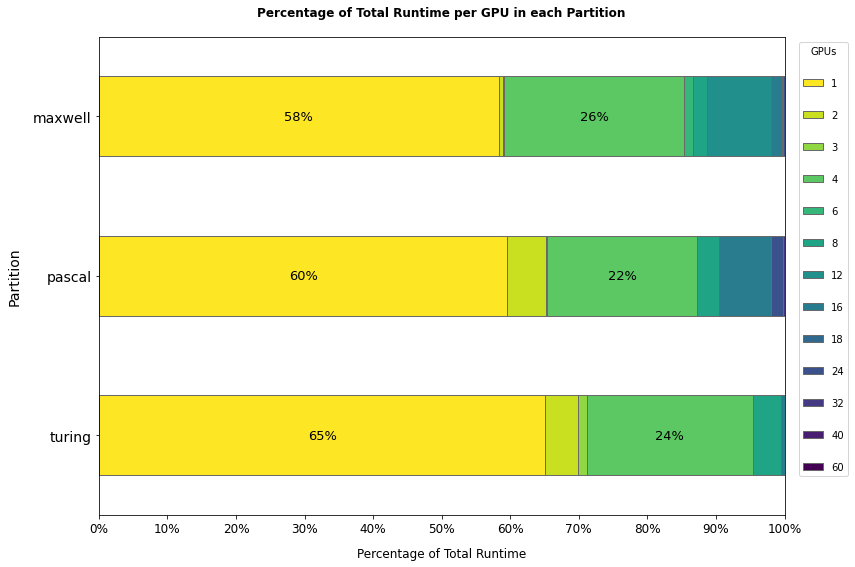

In [354]:
colors= [ '#0000FF', '#FF4500', '#03A89E']
ax = tab6.plot(kind = 'barh', stacked = True, 
               ylabel = 'Percent', rot=0,  
               figsize=(12,8), cmap = 'viridis_r', edgecolor= 'dimgray')
xticks = np.arange(0,1.1,0.1)
xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels, fontsize=12)
plt.yticks(fontsize = 14)
plt.gca().invert_yaxis()


for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and can be used as the label
    label_text = f'{width:.0%}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if width > 0.15:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=13)
    


plt.legend(bbox_to_anchor = (1, 0.5, 0.1, 0.5), ncol = 1, title ='GPUs', labelspacing =2.2)
plt.title('Percentage of Total Runtime per GPU in each Partition', y = 1.03, fontweight = 'bold' )
#plt.subplots_adjust(bottom=0.14)
plt.tight_layout()
plt.xlabel('Percentage of Total Runtime', fontsize=12, labelpad = 12)
plt.ylabel('Partition', fontsize=14, labelpad = 12)
plt.tight_layout()
plt.savefig('q3_2.png', dpi = 250)
plt.show();